
# Project: No-Show Appointments Data Analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The dataset chosen is no-show appointments dataset. It's a medical dataset that provide information about patients who show up in an appointment or miss their appointment. The dataset consists of 14 different columns which are:
- PatientId: The ID of the patient        
- AppointmentID: The ID of the Appointment     
- Gender: Whether the Patient is male or female            
- ScheduledDay: The date when the patient requested an appointement     
- AppointmentDay: The date of the appointment    
- Age:Tthe Patient's age               
- Neighbourhood: The place where the appointment take place     
- Scholarship: Whether or not the patient is enrolled in Brasilian welfare program       
- Hipertension: Whether or not the patient hipertension      
- Diabetes: Whether or not the patient hipertension          
- Alcoholism: Whether or not the patient is alcoholic       
- Handcap: The number of disabilities a patient has            
- SMS_received: Whether or not the patient recieved a notification SMS about the appointment      
- No-show: Yes if the patient missed the appointment and no if they attended it 


### Question(s) for Analysis
>The purpose of this project is to analyze the characteristics associated with patients who show or miss their appointments. The project will focus mainly on the gender, age, the number of days between the schedualed date and appointment date, and the SMS notification and their effect on showing up or missing the appointments. 
 

In [1]:
#Main imports
import pandas as pd
% matplotlib inline
import matplotlib.pyplot as plt



In [ ]:
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [2]:
#Loading Data
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Both ScheduledDay and AppointmentDay are of type string

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- The age has a negative value
- The maximum age is too far from 75% of the data points
- Scholarship, Hipertension, Diabetes, Alcoholism and Handcap means are too small which indicates that most of the patients does not aquire these charactaristics

#### Age out of range values

In [5]:
df.query('Age <0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


#### Age outliers

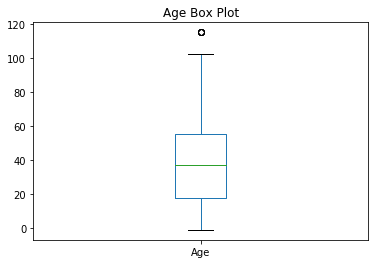

In [6]:
df.Age.plot(kind='box')
plt.title('Age Box Plot');


In [7]:
interquantile = (df.Age.quantile(0.75))- (df.Age.quantile(0.25))
outliers = df.loc[df.Age > df.Age.quantile(0.75) + (1.5*interquantile)]
outliers

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


#### Dublicated rows

In [8]:
df.duplicated().sum()

0

The dataframe does not include any duplicated rows

#### Null counts

In [9]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The dataframe does not include any null values


### Data Cleaning
> In order to clean the data to use it to answer the questions, some modifications and cleaning need to be done as follow:
- Remove age outliers and unlogical data points (age = -1)
- Change the datatype of ScheduledDay and AppointmentDay to date 
- Remove unneeded columns (PatientId, AppointmentID, Scholarship, Neighbourhood, Hipertension, Diabetes, Alcoholism, Handcap)
 

#### Age Cleaning

In [10]:
df.shape

(110527, 14)

In [11]:
df = df[(df.Age != -1) & (df.Age != 115)]
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [12]:
df.shape

(110521, 14)

In [13]:
df.query('Age <0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [14]:
df.query('Age==115')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


All the outliers and unlogical rows were removed from the data and the shape of the data changed (number of rows decreased)

#### Change the datatype of dates from string to date

In [15]:
df.ScheduledDay = df.ScheduledDay.astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110521 non-null float64
AppointmentID     110521 non-null int64
Gender            110521 non-null object
ScheduledDay      110521 non-null datetime64[ns]
AppointmentDay    110521 non-null object
Age               110521 non-null int64
Neighbourhood     110521 non-null object
Scholarship       110521 non-null int64
Hipertension      110521 non-null int64
Diabetes          110521 non-null int64
Alcoholism        110521 non-null int64
Handcap           110521 non-null int64
SMS_received      110521 non-null int64
No-show           110521 non-null object
dtypes: datetime64[ns](1), float64(1), int64(8), object(4)
memory usage: 12.6+ MB


In [16]:
df.AppointmentDay = df.AppointmentDay.astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110521 non-null float64
AppointmentID     110521 non-null int64
Gender            110521 non-null object
ScheduledDay      110521 non-null datetime64[ns]
AppointmentDay    110521 non-null datetime64[ns]
Age               110521 non-null int64
Neighbourhood     110521 non-null object
Scholarship       110521 non-null int64
Hipertension      110521 non-null int64
Diabetes          110521 non-null int64
Alcoholism        110521 non-null int64
Handcap           110521 non-null int64
SMS_received      110521 non-null int64
No-show           110521 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 12.6+ MB


In [17]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The two dates are in different format so changing the ScheduledDay date format needs to be done

In [18]:
df.ScheduledDay= df.ScheduledDay.dt.strftime('%Y-%m-%d')
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110521 non-null float64
AppointmentID     110521 non-null int64
Gender            110521 non-null object
ScheduledDay      110521 non-null object
AppointmentDay    110521 non-null datetime64[ns]
Age               110521 non-null int64
Neighbourhood     110521 non-null object
Scholarship       110521 non-null int64
Hipertension      110521 non-null int64
Diabetes          110521 non-null int64
Alcoholism        110521 non-null int64
Handcap           110521 non-null int64
SMS_received      110521 non-null int64
No-show           110521 non-null object
dtypes: datetime64[ns](1), float64(1), int64(8), object(4)
memory usage: 12.6+ MB


After changing the format of the ScheduledDay date, its datatype became string. So, changing the datatype from string to date needs to be done

In [20]:
df.ScheduledDay = df.ScheduledDay.astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110521 non-null float64
AppointmentID     110521 non-null int64
Gender            110521 non-null object
ScheduledDay      110521 non-null datetime64[ns]
AppointmentDay    110521 non-null datetime64[ns]
Age               110521 non-null int64
Neighbourhood     110521 non-null object
Scholarship       110521 non-null int64
Hipertension      110521 non-null int64
Diabetes          110521 non-null int64
Alcoholism        110521 non-null int64
Handcap           110521 non-null int64
SMS_received      110521 non-null int64
No-show           110521 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 12.6+ MB


In [21]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### Drop unneeded columns

> Both PatientId and AppointmentID columns do not give any information about whether the patient show up or miss the appointment. The Neighbourhood column is not going to be ivestigated in this project as it's irrelevent to the questions asked at the begining of the project. The other columns show that the means of them are less than 20% of the data which means that a very small portion of the patients have these characteristics which will not be useful in the investigation.

In [22]:
df.drop(columns = ['PatientId', 'AppointmentID', 'Scholarship','Neighbourhood', 'Hipertension', 'Diabetes','Alcoholism','Handcap'], inplace = True)

In [23]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,0,No


<a id='eda'></a>
## Exploratory Data Analysis


### Does the difference in days between scheduled and appointment day affect wether the patient shows up or miss the appointment?

#### Number of days between scheduled and appoinment dates

In [24]:
df['diff']= (df.AppointmentDay- df.ScheduledDay).dt.days
df['diff'].value_counts()

 0      38561
 2       6725
 4       5290
 1       5213
 7       4906
 6       4037
 5       3277
 14      2913
 3       2735
 8       2332
 21      1861
 28      1706
 13      1682
 9       1605
 15      1502
 10      1391
 20      1187
 22      1173
 16      1151
 12      1115
 17      1107
 29      1089
 19      1044
 18      1021
 27      1013
 11       987
 35       963
 23       822
 34       808
 26       731
        ...  
 98         5
 112        5
 103        5
 109        5
 108        5
 102        4
-1          4
 105        4
 96         4
 119        4
 122        3
 92         3
 115        2
 93         2
 110        2
 107        2
 97         2
 94         2
 123        1
 101        1
 126        1
 125        1
 139        1
 151        1
 132        1
 117        1
 146        1
 82         1
-6          1
 127        1
Name: diff, Length: 131, dtype: int64

In [25]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,SMS_received,No-show,diff
0,F,2016-04-29,2016-04-29,62,0,No,0


#### Check if days less than 0

In [26]:
df.query('diff <0')

,Gender,ScheduledDay,AppointmentDay,Age,SMS_received,No-show,diff
27033,M,2016-05-10,2016-05-09,38,0,Yes,-1
55226,F,2016-05-18,2016-05-17,19,0,Yes,-1
64175,F,2016-05-05,2016-05-04,22,0,Yes,-1
71533,F,2016-05-11,2016-05-05,81,0,Yes,-6
72362,M,2016-05-04,2016-05-03,7,0,Yes,-1


> The data shows that there are values in negative which is not possible as the patients cannot attend the appointment before schedueling it so cleaning the data is needed

In [27]:
df.shape

(110521, 7)

In [28]:
df = df[(df['diff'] != -6) & (df['diff'] != -1)]
df.shape

(110516, 7)

#### Data Visualization

In [29]:
#get the data points of those who show up or miss their appointments
show = df['No-show'] == "No"
missed = df['No-show'] == "Yes"

In [30]:
df['diff'][show].mean()

8.7547871435859648

In [31]:
df['diff'][missed].mean()

15.835641611761014

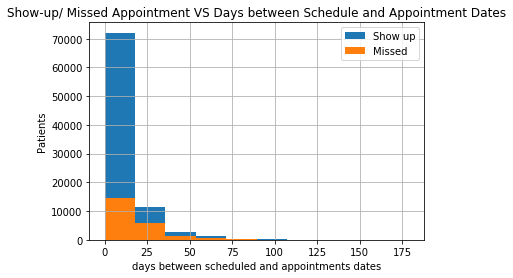

In [32]:
df['diff'][show].hist(bins =10, label = 'Show up')
df['diff'][missed].hist( bins =10, label = 'Missed')
plt.legend()
plt.title('Show-up/ Missed Appointment VS Days between Schedule and Appointment Dates')
plt.xlabel('days between scheduled and appointments dates')
plt.ylabel('Patients');

> Based on the observation of the above data, it's clear that patients that needs to wait less tend to show up in the appointments than those who needs to wait too long for their appointment

### Does the age of the patient affect wether the patient will show up or miss the appointement?

In [33]:
df['Age'][show].mean()

37.788753472025398

In [34]:
df['Age'][missed].mean()

34.307023441351802

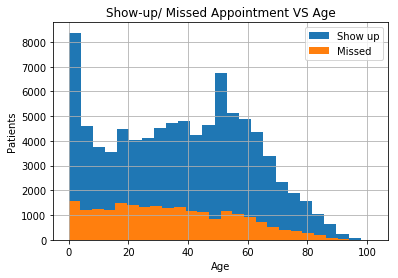

In [36]:
df['Age'][show].hist(bins =25, label = 'Show up')
df['Age'][missed].hist( bins =25, label = 'Missed')
plt.legend()
plt.title('Show-up/ Missed Appointment VS Age')
plt.xlabel('Age')
plt.ylabel('Patients');

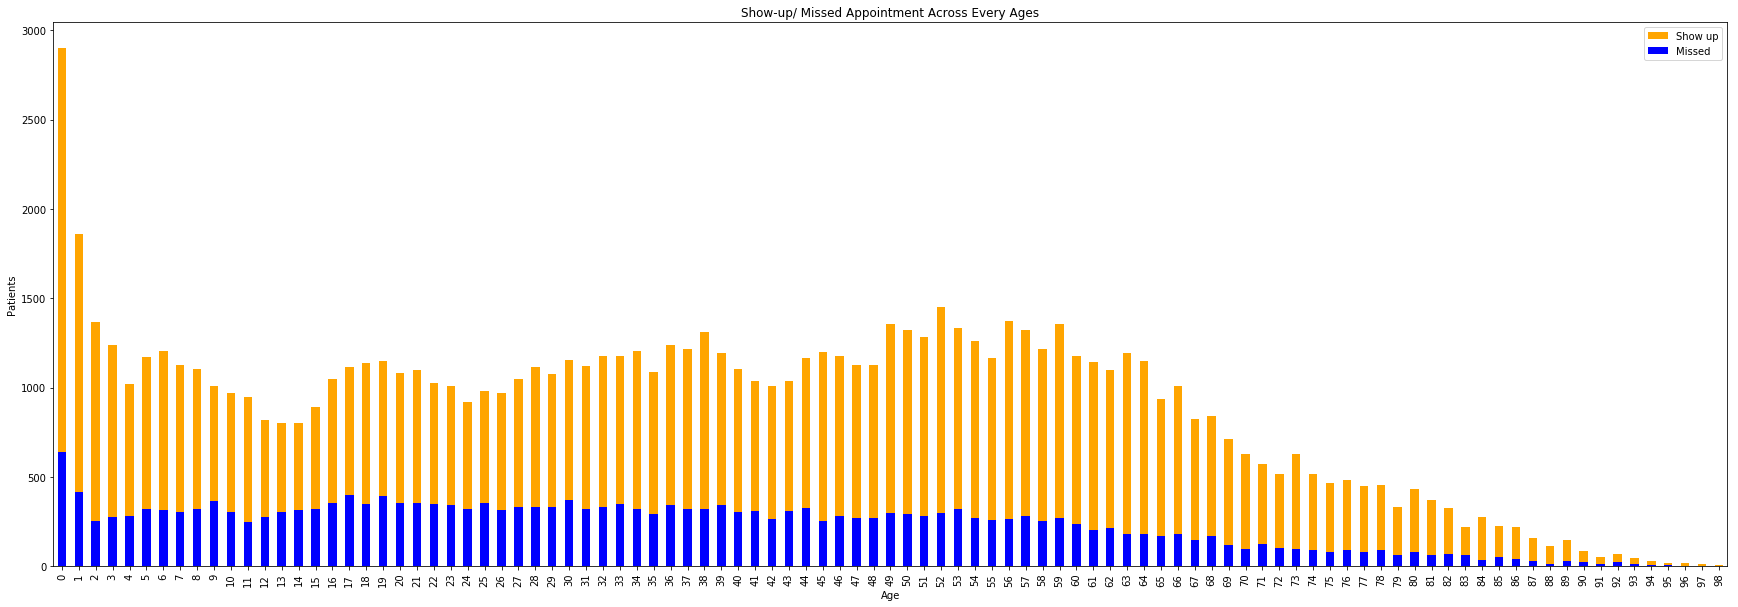

In [37]:
df['Age'][show].value_counts().sort_index().plot(kind = 'bar', label = 'Show up', color = 'orange', figsize = (30,10))
df['Age'][missed].value_counts().sort_index().plot(kind = 'bar', label = 'Missed', color = 'blue', figsize = (30,10))
plt.legend()
plt.title('Show-up/ Missed Appointment Across Every Ages')
plt.xlabel('Age')
plt.ylabel('Patients');

> Based on the observation above, there is no strong relationship between age and wether the patient show up or miss an appointment. However, younger patients (between age 0 to 10) tend to show up more than old patients.

### What is the relationship between the patient's gender and the no-show appointement?

In [38]:
Gcounts = df.groupby('Gender')['No-show'].value_counts()
Gcounts

Gender  No-show
F       No         57243
        Yes        14588
M       No         30962
        Yes         7723
Name: No-show, dtype: int64

In [39]:
FShowed = Gcounts[0]/(Gcounts[0]+Gcounts[1])
FShowed

0.79691219668388302

In [40]:
MShowed = Gcounts[2]/ (Gcounts[2]+Gcounts[3])
MShowed

0.80036189737624397

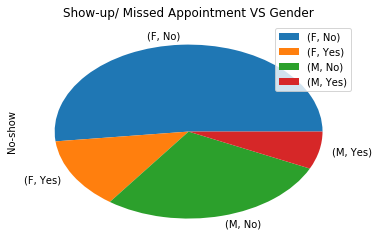

In [41]:
Gcounts.plot(kind= 'pie')
plt.legend()
plt.title('Show-up/ Missed Appointment VS Gender');

> The information above show that the number of female patients are more than male patients. It also show that both males and females' means that show up in the appointement are almost the same which show that there is no relationship between the gender of the patient and whether he/she show up or miss an appointement.

### What is the effect of recieving a SMS notification on patients' decision of wether to show up or miss the appointement?

In [42]:
SMS_counts = df.groupby('SMS_received')['No-show'].value_counts()
SMS_counts


SMS_received  No-show
0             No         62508
              Yes        12527
1             No         25697
              Yes         9784
Name: No-show, dtype: int64

In [43]:
showed_no_sms = SMS_counts[0][0]/(SMS_counts[0][0]+SMS_counts[0][1])
showed_no_sms

0.83305124275338172

In [44]:
showed_sms = SMS_counts[1][0]/(SMS_counts[1][0]+SMS_counts[1][1])
showed_sms

0.7242467799667428

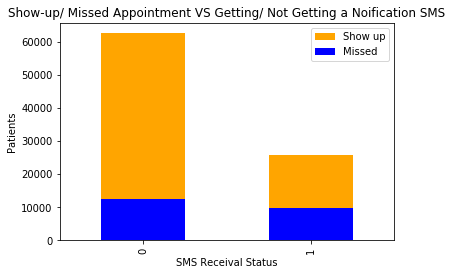

In [45]:
df['SMS_received'][show].value_counts().plot(kind = 'bar', label = 'Show up', color = 'orange')
df['SMS_received'][missed].value_counts().plot(kind = 'bar', label = 'Missed', color = 'blue')
plt.legend()
plt.title('Show-up/ Missed Appointment VS Getting/ Not Getting a Noification SMS')
plt.xlabel('SMS Receival Status')
plt.ylabel('Patients');

> A surprising observation was that people who recieved a notification tend to miss the appointements than those who didn't recieve an SMS notification.

<a id='conclusions'></a>
## Conclusions

> This dataset show some interesting observations as follows:
- Patients that needs to wait less between the scheduled date and the appointement date tend to show up in the appointments than those who needs to wait too long for their appointment.
- There is no strong relationship between the patient's age and whether or not he/she will appear in the appointement; however young patients (between 0 and 10) tend to show up more often than old patients. 
- There is no relationship between the gender of the patient and whether he/she show up or miss an appointement.
- People who recieved a notification tend to miss the appointements than those who didn't recieve an SMS notification.

### Limitations
> One of the limitations of this dataset is that there is no information about how far the patients are from their appointement place. This data might affect the observations in this project. Another data that might help in drawing conclusions is how severe the illness of the patient is.  


In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0